In [29]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from highschool_class import HighSchool_DF
import pickle
from models import select_optimal_alpha, lasso_to_identify_best_coefficients, linear_model_with_meaningful_features
import seaborn as sns

In [7]:
with open('../data/pickles/model_data_from_python_script.p', 'rb') as read_file:
    df = pickle.load(read_file)

In [8]:
df_1617 = HighSchool_DF(df).isolate_school_year_1617()
df_1617_no_outliers = df_1617.remove_2std_outliers()
y_1617 = df_1617_no_outliers.target_variable()
features_1617 = df_1617_no_outliers.features()
best_alpha_1617 = select_optimal_alpha(features_1617, y_1617)
meaningful_features_1617 = lasso_to_identify_best_coefficients(features_1617, y_1617, best_alpha_1617)
linear_model_with_meaningful_features(features_1617, y_1617, meaningful_features_1617)

0.15209913609029876
0.009000000000000001
student_count_total 0.0
Fully Accessible 0.002108879072714359
Generally accessible 0.0004244065030646136
student_count_asian_perc -0.004290448524870479
student_count_asian_pacific_islander_perc -0.0203240892649205
student_count_black_perc 0.0
student_count_english_learners_perc 0.11529571496928348
student_count_ethnicity_not_available_perc -0.011604649665504667
student_count_hawaiian_pacific_islander_perc 0.0
student_count_hispanic_perc -0.3624219500354743
student_count_low_income_perc 0.16208293679243682
student_count_multi_perc -0.006577611414871522
student_count_native_american_perc 0.04432610674091864
student_count_other_ethnicity_perc 0.0
student_count_special_ed_perc 0.1692061364672091
student_count_white_perc 0.04657992565503855
Classroom_Languages_count -0.0
Blue 0.0
Brown -0.001778109721845527
Green -0.0841342492767474
Orange 0.047063984346130544
Pink 0.04798663041984944
Purple -0.0008009933340648201
Red -0.06657203113374109
Dress_Code_

In [13]:
df_1617 = HighSchool_DF(df).isolate_school_year_1617()
df_1617_no_outliers = df_1617.remove_2std_outliers()
y_1617 = df_1617_no_outliers.target_variable()
features_1617 = df_1617_no_outliers.features()
meaningful_1617_features = features_1617[lasso_to_identify_best_coefficients(features_1617, y_1617, best_alpha_1617)]


student_count_total 0.0
Fully Accessible 0.002108879072714359
Generally accessible 0.0004244065030646136
student_count_asian_perc -0.004290448524870479
student_count_asian_pacific_islander_perc -0.0203240892649205
student_count_black_perc 0.0
student_count_english_learners_perc 0.11529571496928348
student_count_ethnicity_not_available_perc -0.011604649665504667
student_count_hawaiian_pacific_islander_perc 0.0
student_count_hispanic_perc -0.3624219500354743
student_count_low_income_perc 0.16208293679243682
student_count_multi_perc -0.006577611414871522
student_count_native_american_perc 0.04432610674091864
student_count_other_ethnicity_perc 0.0
student_count_special_ed_perc 0.1692061364672091
student_count_white_perc 0.04657992565503855
Classroom_Languages_count -0.0
Blue 0.0
Brown -0.001778109721845527
Green -0.0841342492767474
Orange 0.047063984346130544
Pink 0.04798663041984944
Purple -0.0008009933340648201
Red -0.06657203113374109
Dress_Code_dummie -0.035340927507531615
grades_offer

In [25]:
lm = LinearRegression()
lm.fit(meaningful_1617_features, y_1617)
predictions = lm.predict(meaningful_1617_features)
residuals = predictions - y_1617
print(residuals)

2      0.359870
3      0.013990
4      0.363449
6     -0.053401
8      0.022660
9      0.252947
11     0.050613
14    -0.720349
15    -0.177441
16    -0.006482
17     0.162002
19    -0.243408
20    -0.225056
21     0.244222
22     1.005696
25    -0.647358
26    -0.199868
28    -0.248942
29    -0.028307
30    -0.458928
32     0.422007
33    -0.129514
36    -0.447445
39    -0.609933
40    -0.457638
42     0.021522
43     0.069024
45    -0.256389
47     0.295766
49    -0.312205
         ...   
129    0.150860
134   -0.403784
136   -0.267025
137   -0.113873
139   -0.313897
140    0.001701
141    0.109168
143   -0.153066
144    0.032875
145    0.124241
146   -0.589809
148    0.562837
150   -0.343909
151   -0.000712
152   -0.044258
153   -0.434105
154    0.144508
156   -0.387167
158   -0.202303
159   -0.056592
160   -0.723870
161   -0.193596
162    0.213557
167   -0.472141
168    0.004293
171    0.091994
172   -0.245156
173    0.339709
177    0.404111
178    0.561785
Name: log_grad_rate, Len

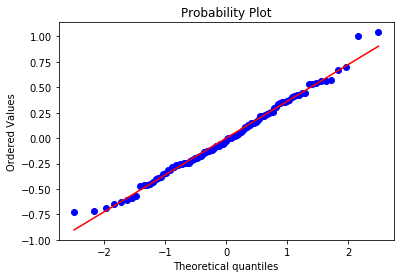

In [26]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


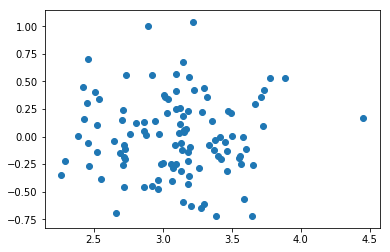

In [28]:
plt.scatter(predictions, residuals)

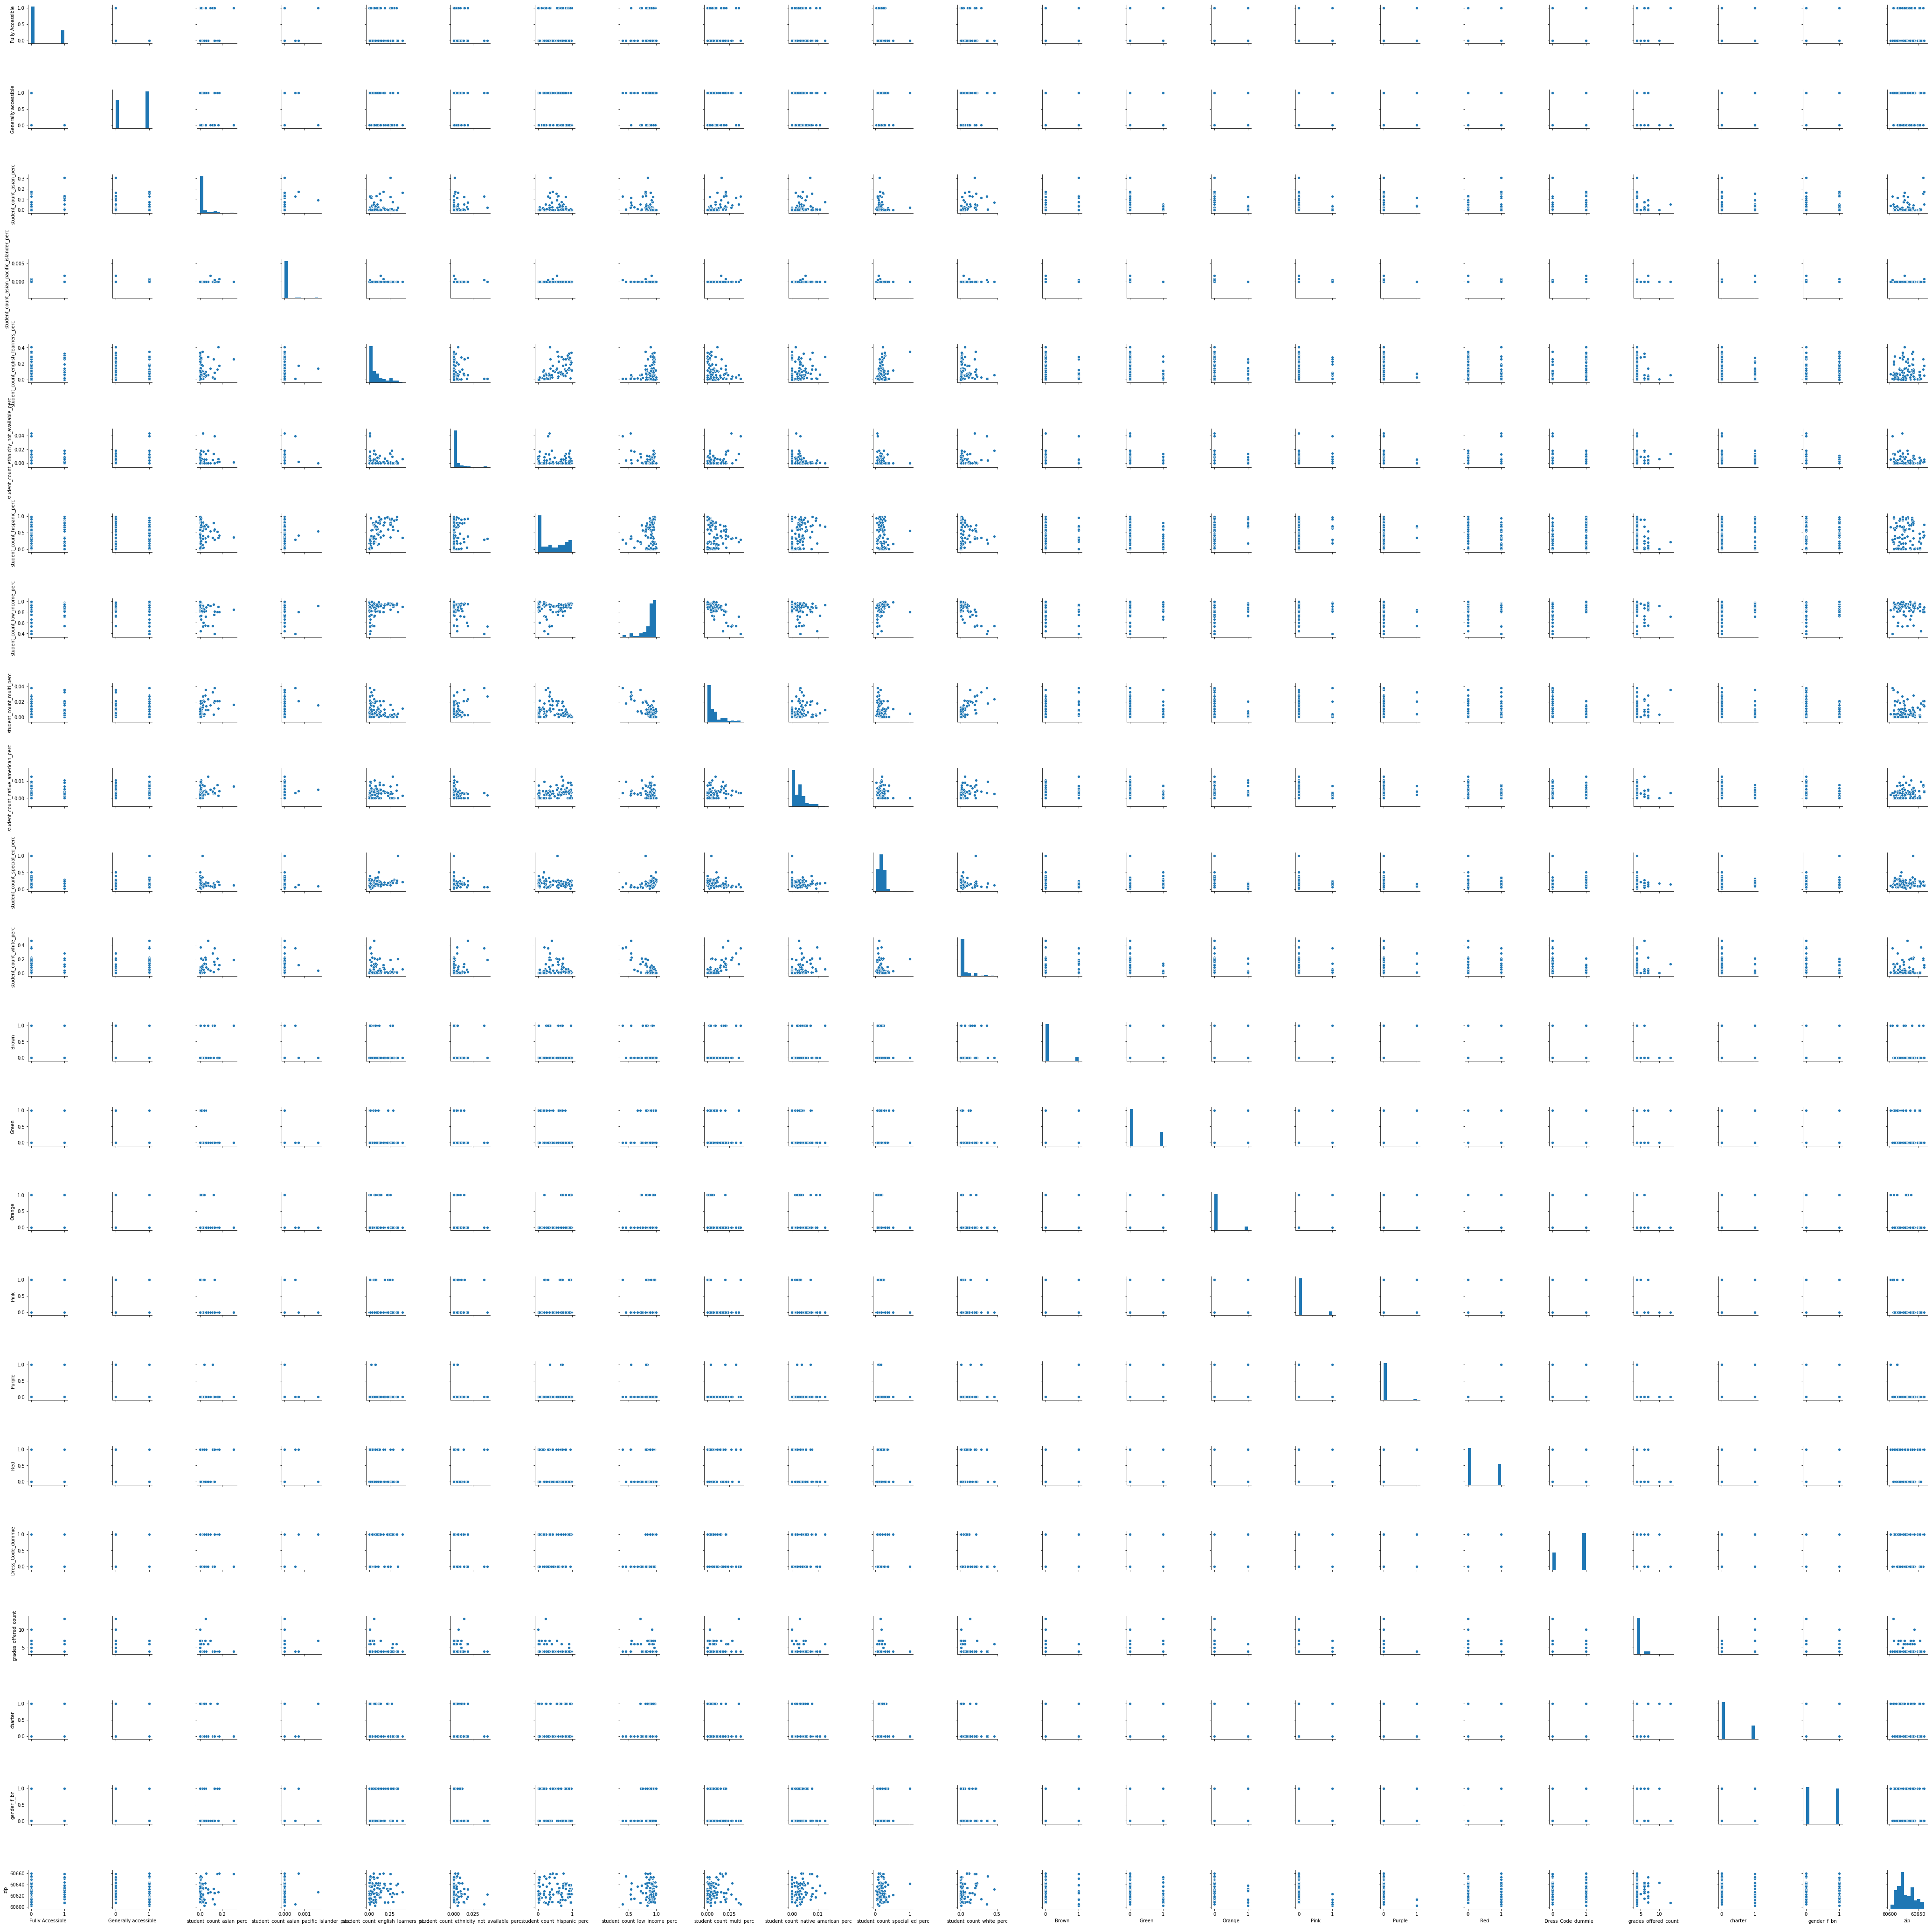

In [30]:
sns.pairplot(meaningful_1617_features)